<a href="https://colab.research.google.com/github/sainisatish/DeepLearningFromScratch/blob/main/IMDB%20binary%20clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below code is an example of book ( Deep learning with Python )


In [1]:
import numpy as np

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items() ])

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
decoded_review = " ".join( reverse_word_index.get(i-3,"?") for i in train_data[0] )

In [6]:
def vectorize_sequences(sequences, dimension=10000):   # multi hot encoding
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.                        
    return results
x_train = vectorize_sequences(train_data)             
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test  = np.asarray(test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1 ,activation="sigmoid")
                        ])

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5198 - accuracy: 0.7936 - val_loss: 0.3966 - val_accuracy: 0.8714
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3154 - accuracy: 0.9047 - val_loss: 0.3106 - val_accuracy: 0.8899
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2344 - accuracy: 0.9271 - val_loss: 0.2888 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1858 - accuracy: 0.9413 - val_loss: 0.2778 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1526 - accuracy: 0.9524 - val_loss: 0.2756 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1260 - accuracy: 0.9631 - val_loss: 0.3074 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1068 - accuracy: 0.9680 - val_loss: 0.3039 - val_accuracy: 0.8854
Epoch 8/20
30

In [15]:
history_dict = history.history

In [16]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

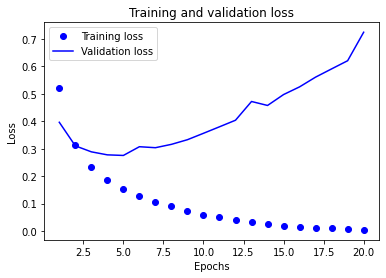

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")   
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

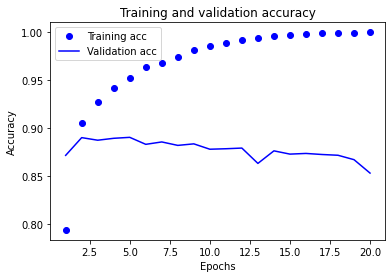

In [20]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()